In [1]:
import pandas as pd
import glob

# Get a list of all the csv files
all_files = glob.glob("data/*.csv")

# Initialize an empty list that will be filled with each file's DataFrame
all_dfs = []

# Loop over the list of files and read each one into a DataFrame
for file in all_files:
    df = pd.read_csv(file)
    all_dfs.append(df)

# Concatenate all the dataframes in the list into a single DataFrame
df = pd.concat(all_dfs, ignore_index=True)
df = df.drop_duplicates()
df = df[df['latitude'].notna() & df['longitude'].notna()]
df.to_csv("allfrituren.csv")

In [2]:
df

,placeUrl,title,rating,reviewCount,category,attributes,address,plusCode,website,phoneNumber,...,saturday,sunday,currentStatus,imgUrl,isClaimed,latitude,longitude,query,timestamp,info
0,https://www.google.com/maps/place/Frituur+%27t...,Frituur 't Koxke,4.4,114.0,Frituur,· Dine-in · Takeaway · Delivery,"'s-Herenstraat 25, 2140 Antwerpen, Belgium","6C6P+Q7 Antwerp, Belgium",https://m.facebook.com/pages/category/Restaura...,NaN,...,4 PM–12 AM,4 PM–12 AM,Closed,https://lh5.googleusercontent.com/p/AF1QipNzOf...,True,51.211937,4.435688,https://www.google.com/maps/search/frituur/@51...,2023-06-19T13:35:21.507Z,NaN
1,https://www.google.com/maps/place/Frituur+%27t...,Frituur 't hoekske,4.1,74.0,Frituur,· Dine-in · Takeaway,"Sterlingerstraat 2, 2140 Antwerpen, Belgium","6C6M+CM Antwerp, Belgium",http://www.frituurthoekskeborgerhout.be/,+32 493 43 19 00,...,5 PM–2 AM,5–10 PM,Closed,https://lh5.googleusercontent.com/p/AF1QipMamg...,True,51.211062,4.434187,https://www.google.com/maps/search/frituur/@51...,2023-06-19T13:35:28.825Z,NaN
2,https://www.google.com/maps/place/Friturist/da...,Friturist,4.0,77.0,Frituur,· Dine-in · Takeaway · Delivery,"Passendalestraat 2, 2600 Antwerpen, Belgium","5CWV+3V Antwerp, Belgium",https://www.openingsurengids.be/de-friturist/a...,+32 485 61 05 51,...,4:30–10 PM,4:30–10 PM,Open now,https://lh5.googleusercontent.com/p/AF1QipMRV-...,True,51.195187,4.444688,https://www.google.com/maps/search/frituur/@51...,2023-06-19T13:35:35.516Z,NaN
3,https://www.google.com/maps/place/Frituur+Rich...,Frituur Richard,4.1,84.0,Frituur,NaN,"Helmstraat 119, 2140 Antwerpen, Belgium","6C9P+6F Antwerp, Belgium",http://www.frituur-richard.be/,+32 3 235 31 98,...,4:30–10 PM,4:30–10 PM,Closed,https://lh5.googleusercontent.com/p/AF1QipPDYX...,False,51.218062,4.436188,https://www.google.com/maps/search/frituur/@51...,2023-06-19T13:35:43.069Z,NaN
4,https://www.google.com/maps/place/Frituur+den+...,Frituur den Hoek af,4.3,51.0,Frituur,· Dine-in · Takeaway · Delivery,"Troonplaats 11, 2018 Antwerpen, Belgium","693R+FP Antwerp, Belgium",https://frituur-den-hoek-af.unipage.eu/,+32 467 87 63 31,...,5–11:30 PM,5–11:30 PM,Closed today,https://lh5.googleusercontent.com/p/AF1QipNoJT...,True,51.203687,4.391812,https://www.google.com/maps/search/frituur/@51...,2023-06-19T13:35:53.517Z,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,https://www.google.com/maps/place/Frituur+-+Ee...,Frituur - Eethuis EnRoute,4.1,688.0,Frituur,· Dine-in · Takeaway · No-contact delivery,"Roeselaarsestraat 9a, 8850 Ardooie, Belgium","X5CV+HC Ardooie, Belgium",http://www.eethuis-enroute.be/,+32 51 70 03 56,...,"11:30 AM–2 PM, 5:30–10 PM",11:30 AM–9 PM,Closed,https://lh5.googleusercontent.com/p/AF1QipOKGG...,True,50.971437,3.193562,https://www.google.com/maps/search/frituur/@50...,2023-06-19T14:35:27.693Z,NaN
1416,https://www.google.com/maps/place/Frituur+Drie...,Frituur Driemasten Bvba,NaN,NaN,Frituur,NaN,"Klijtstraat 8, 8560 Wevelgem, Belgium","V53R+V7 Wevelgem, Belgium",NaN,+32 56 42 32 00,...,NaN,NaN,NaN,https://streetviewpixels-pa.googleapis.com/v1/...,False,50.854687,3.190688,https://www.google.com/maps/search/frituur/@50...,2023-06-19T14:35:33.001Z,NaN
1417,https://www.google.com/maps/place/Frituur+Drie...,Frituur Driemasten,4.4,106.0,Frituur,· Dine-in · Takeaway · Delivery,"Driemasten 15/Z, 8560 Wevelgem, Belgium","R5XX+77 Wevelgem, Belgium",NaN,+32 56 40 06 82,...,11 AM–2 PM,"11 AM–2 PM, 5–10 PM",Closed today,https://lh5.googleusercontent.com/p/AF1QipMsbk...,False,50.848188,3.198188,https://www.google.com/maps/search/frituur/@50...,2023-06-19T14:35:39.537Z,NaN
1418,https://www.google.com/maps/place/Frituur+Vosk...,Frituur Voske Ardooie,4.7,41.0,Frituur,· Dine-in · Takeaway · Delivery,"Stationsstraat 75, 8850 Ardooie, Belgium","X6J2+P6 Ardooie, Belgium",http://www.frituurvoske.be/,+32 478 36 91 12,...,"11:30 AM–1:30 PM, 5:30–10 PM","11:30 AM–1:30 PM, 5:30–10 PM",Closed today,https://lh5.googleusercontent.com/p/AF1QipN

In [27]:
# Extract the coordinates
coordinates = df[['latitude', 'longitude']].values
coordinates

array([[51.2119375,  4.4356875],
       [51.2110625,  4.4341875],
       [51.1951875,  4.4446875],
       ...,
       [50.8481875,  3.1981875],
       [50.9818125,  3.2005625],
       [50.9074375,  3.2018125]])

In [4]:
import numpy as np
from numpy import where, clip, logical_and, ones, array, ceil
from numpy.random import uniform
from copy import deepcopy
from matplotlib.animation import FuncAnimation
from IPython.display import Image
import matplotlib.pyplot as plt
from numpy import sum, pi, exp, sqrt, cos, ones
from numpy.random import uniform, choice
from numpy import abs, zeros, log10, where, arctanh, tanh

class Root:
    """
    This is the root of all implemented Slime Mold Algorithms. It serves as a base class providing necessary
    utility methods and attributes used in all child algorithm classes.
    """

    ID_MIN_PROB = 0  # Indicator of minimization problem
    ID_MAX_PROB = -1  # Indicator of maximization problem

    ID_POS = 0  # Indicator for Position
    ID_FIT = 1  # Indicator for Fitness

    EPSILON = 10E-10  # Small constant value to avoid division by zero

    def __init__(self, obj_func=None, lb=None, ub=None, problem_size=50, verbose=True):
        """
        Parameters
        ----------
        obj_func : function
            Objective function to be optimized
        lb : list
            Lower bounds of the search space
        ub : list
            Upper bounds of the search space
        problem_size : int, optional
            Number of decision variables
        verbose : bool, optional
            Whether to print progress of the algorithm
        """
        self.obj_func = obj_func

        # Initialization of lower and upper bounds
        if (lb is None) or (ub is None):
            if problem_size is None:
                print("Problem size must be an integer number")
                exit(0)
            elif problem_size <= 0:
                print("Problem size must be > 0")
                exit(0)
            else:
                self.problem_size = int(ceil(problem_size))
                self.lb = -1 * ones(problem_size)
                self.ub = 1 * ones(problem_size)
        else:
            # Validation of lower and upper bounds
            if isinstance(lb, list) and isinstance(ub, list) and not (problem_size is None):
                if (len(lb) == len(ub)) and (problem_size > 0):
                    if len(lb) == 1:
                        self.problem_size = problem_size
                        self.lb = lb[0] * ones(problem_size)
                        self.ub = ub[0] * ones(problem_size)
                    else:
                        self.problem_size = len(lb)
                        self.lb = array(lb)
                        self.ub = array(ub)
                else:
                    print("Lower bound and Upper bound need to be the same length. Problem size must be > 0")
                    exit(0)
            else:
                print("Lower bound and Upper bound need to be a list. Problem size is an integer number")
                exit(0)

        self.verbose = verbose
        self.epoch, self.pop_size = None, None  # Initialize epoch and population size to None
        self.solution, self.loss_train = None, []  # Initialize solution and training loss to None and empty list

    def create_solution(self, minmax=0):
        """
        Return the solution with 2 elements: position of solution and fitness of solution
        Parameters
        ----------
        minmax: int
            0 - minimization problem, else - maximization problem
        """
        position = uniform(self.lb, self.ub)  # Generate a random position within the bounds
        fitness = self.get_fitness_position(position=position, minmax=minmax)  # Get the fitness of the position
        return [position, fitness]

    def get_fitness_position(self, position=None, minmax=0):
        """
        Assumption that objective function always return the original value
        Parameters
        ----------
        position: 1-D numpy array
            Position in the search space
        minmax: int
            0 - minimization problem, 1 - maximization problem
        Returns
        -------
        Fitness of the given position
        """
        return self.obj_func(position) if minmax == 0 else 1.0 / (self.obj_func(position) + self.EPSILON)

    def get_sorted_pop_and_global_best_solution(self, pop=None, id_fit=None, id_best=None):
        """
        Sort population and return the sorted population and the best solution
        Parameters
        ----------
        pop: list
            Population list
        id_fit: int
            Identifier for fitness
        id_best: int
            Identifier for best solution
        Returns
        -------
        Sorted population list and best solution
        """
        sorted_pop = sorted(pop, key=lambda temp: temp[id_fit])  # Sort population based on fitness
        return sorted_pop, deepcopy(sorted_pop[id_best])  # Return sorted population and best solution

    def amend_position(self, position=None):
        """
        Clip position so that it remains within the defined bounds
        Parameters
        ----------
        position: numpy array
            Position to be clipped
        Returns
        -------
        Clipped position
        """
        return clip(position, self.lb, self.ub)  # Clip position with respect to lower and upper bounds

    def amend_position_random(self, position=None):
        """
        Amend the position randomly if it is out of bounds
        Parameters
        ----------
        position: numpy array
            Position to be amended
        Returns
        -------
        Amended position
        """
        return where(logical_and(self.lb <= position, position <= self.ub), position, uniform(self.lb, self.ub))

    def update_sorted_population_and_global_best_solution(self, pop=None, id_best=None, g_best=None):
        """
        Sort the population and update the current best solution.
        Return the sorted population and the new current best solution
        Parameters
        ----------
        pop: list
            Population list
        id_best: int
            Identifier for best solution
        g_best: list
            Current best solution
        Returns
        -------
        Sorted population list and updated best solution
        """
        sorted_pop = sorted(pop, key=lambda temp: temp[self.ID_FIT])  # Sort population based on fitness
        current_best = sorted_pop[id_best]  # Get the current best solution from sorted population
        # Update the global best solution if current best solution is better
        g_best = deepcopy(current_best) if current_best[self.ID_FIT] < g_best[self.ID_FIT] else deepcopy(g_best)
        return sorted_pop, g_best  # Return sorted population and updated global best solution
class OriginalSMA(Root):
    """
    Original version of Slime Mould Algorithm (SMA)
    """
    ID_WEI = 2  # Index of the 'weight' component of a solution in the population

    def __init__(self, obj_func=None, lb=None, ub=None, problem_size=50, verbose=True, epoch=750, pop_size=100, z=0.03, improvement_threshold=1e-10, max_stagnant_iterations=50):
        """
        Initialize OriginalSMA
        """
        # Initialize root with objective function, lower bound, upper bound, problem size, and verbosity level
        Root.__init__(self, obj_func, lb, ub, problem_size, verbose)
        self.epoch = epoch  # Number of training iterations
        self.pop_size = pop_size  # Population size
        self.z = z  # Parameter used in position update
        self.improvement_threshold = improvement_threshold  # Fitness improvement threshold
        self.max_stagnant_iterations = max_stagnant_iterations  # Maximum number of stagnant iterations


    def create_solution(self, minmax=0):
        """
        Create a new solution
        """
        pos = uniform(self.lb, self.ub)  # Generate a random position within the bounds
        fit = self.get_fitness_position(pos)  # Get fitness of the position
        weight = zeros(self.problem_size)  # Initialize weight vector to zero
        return [pos, fit, weight]  # Solution is a combination of position, fitness, and weight

    def train(self):
        """
        Train using SMA
        """
        # Create initial population
        pop = [self.create_solution() for _ in range(self.pop_size)]
        # Sort the population and get the global best solution
        pop, g_best = self.get_sorted_pop_and_global_best_solution(pop, self.ID_FIT, self.ID_MIN_PROB)  # Eq.(2.6)
        stagnant_iterations = 0
        optimal_positions = []

        for epoch in range(self.epoch):
            # Store old best fitness for convergence check
            old_best_fit = g_best[self.ID_FIT]
            s = pop[0][self.ID_FIT] - pop[-1][self.ID_FIT] + self.EPSILON  # Compute 's' parameter

            # Calculate the fitness weight of each slime mould
            for i in range(0, self.pop_size):
                # Eq.(2.5)
                if i <= int(self.pop_size / 2):
                    # First half of population gets increased weight
                    pop[i][self.ID_WEI] = 1 + uniform(0, 1, self.problem_size) * log10((pop[0][self.ID_FIT] - pop[i][self.ID_FIT]) / s + 1)
                else:
                    # Second half of population gets decreased weight
                    pop[i][self.ID_WEI] = 1 - uniform(0, 1, self.problem_size) * log10((pop[0][self.ID_FIT] - pop[i][self.ID_FIT]) / s + 1)

            # Compute 'a' and 'b' parameters for position update
            a = arctanh(-((epoch + 1) / self.epoch) + 1)  # Eq.(2.4)
            b = 1 - (epoch + 1) / self.epoch

            # Update the Position of search agents
            for i in range(0, self.pop_size):
                if uniform() < self.z:  # Eq.(2.7)
                    # Generate a completely new random position within bounds
                    pop[i][self.ID_POS] = uniform(self.lb, self.ub)
                else:
                    # Update position based on current fitness and positions of other individuals
                    p = tanh(abs(pop[i][self.ID_FIT] - g_best[self.ID_FIT]))  # Eq.(2.2)
                    vb = uniform(-a, a, self.problem_size)  # Eq.(2.3)
                    vc = uniform(-b, b, self.problem_size)
                    # For each dimension of the problem
                    for j in range(0, self.problem_size):
                        # Two random individuals selected from population
                        id_a, id_b = choice(list(set(range(0, self.pop_size)) - {i}), 2, replace=False)
                        if uniform() < p:  # Eq.(2.1)
                            # Update position based on best position and positions of two other individuals
                            pop[i][self.ID_POS][j] = g_best[self.ID_POS][j] + vb[j] * (pop[i][self.ID_WEI][j] * pop[id_a][self.ID_POS][j] - pop[id_b][self.ID_POS][j])
                        else:
                            # Update position based on current position
                            pop[i][self.ID_POS][j] = vc[j] * pop[i][self.ID_POS][j]

            # Check the bounds and calculate the fitness for each individual after all position updates are done
            for i in range(0, self.pop_size):
                pos_new = self.amend_position(pop[i][self.ID_POS])  # Check bounds of the new position
                fit_new = self.get_fitness_position(pos_new)  # Calculate fitness of the new position
                pop[i][self.ID_POS] = pos_new  # Update the position in the population
                pop[i][self.ID_FIT] = fit_new  # Update the fitness in the population

            # Sort the population and update the global best solution
            pop, g_best = self.update_sorted_population_and_global_best_solution(pop, self.ID_MIN_PROB, g_best)
            self.loss_train.append(g_best[self.ID_FIT])  # Append loss of global best solution
            if self.verbose:
                print("> Epoch: {}, Best fit: {}".format(epoch + 1, g_best[self.ID_FIT]))

            fitness_improvement = abs(old_best_fit - g_best[self.ID_FIT])
            if fitness_improvement < self.improvement_threshold:
                stagnant_iterations += 1  # Increase stagnant counter
                if stagnant_iterations >= self.max_stagnant_iterations:
                    print(f"Convergence achieved at iteration {epoch + 1}. Training stopped.")
                    break  # Stop training if stagnant for too long
            else:
                stagnant_iterations = 0  # Reset stagnant counter if significant improvement

            optimal_positions_this_epoch = [self.amend_position(slime[self.ID_POS]) for slime in pop]
            optimal_positions.append(optimal_positions_this_epoch)

        self.solution = g_best  # Update the best solution found
        return g_best[self.ID_POS], g_best[self.ID_FIT], self.loss_train, optimal_positions


1. **Initialization**: In the `__init__` method, we added two new instance variables: `cities` and `dist_matrix`. `cities` is a list of city coordinates, and `dist_matrix` is a 2D array representing the distance between each pair of cities. We calculate `dist_matrix` using the `distance_matrix` function from `scipy.spatial`. We also set `problem_size` to the number of cities.

2. **Creating a solution**: In the `create_solution` method, we generate a random permutation of the city indices to represent a tour. We calculate the total distance of the tour using the `get_fitness_position` method and initialize a weight vector to zero. The solution is a list containing the tour, its total distance, and the weight vector.

3. **Calculating fitness**: In the `get_fitness_position` method, we calculate the total distance of a tour given a permutation of city indices. We do this by summing up the distances between consecutive cities in the tour.

4. **Amending a position**: In the `amend_position` and `amend_position_random` methods, we don't need to make any changes to the position (i.e., the tour), so we simply return the input position.

5. **Training**: In the `train` method, we made several changes to adapt the original SMA algorithm to the TSP:

   - We generate the initial population using the `create_solution` method.
   
   - We calculate the fitness of each solution using the `get_fitness_position` method.
   
   - We update the position and fitness of each solution in the population.
   
   - We generate a new random permutation if a random number is less than `self.z`.
   
   - We update the position and fitness of each solution in the population again after generating new permutations.

The main idea behind these changes is to adapt the original SMA algorithm, which is a general-purpose optimization algorithm, to the specific requirements of the TSP. In the TSP, a solution is a permutation of city indices representing a tour, and the fitness of a solution is the total distance of the tour. Therefore, we needed to redefine the methods for creating a solution, calculating fitness, and amending a position to reflect these requirements.

In [5]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r


In [6]:
class TSPSMA(OriginalSMA): # with break!!!!
    def __init__(self, obj_func=None, cities=None, verbose=True, epoch=1500, pop_size=100, z=0.03, tolerance = 1e-16, max_epochs_without_improvement = 30):
        self.cities = cities
        self.dist_matrix = distance_matrix(cities, cities)  # Calculate distance matrix
        problem_size = len(cities)
        self.dist_matrix = np.array([[haversine(lon1, lat1, lon2, lat2) for lon2, lat2 in cities] for lon1, lat1 in cities])  # Calculate distance matrix
        problem_size = len(cities)
        super().__init__(obj_func, None, None, problem_size, verbose, epoch, pop_size, z)
        self.tolerance = tolerance
        self.max_epochs_without_improvement = max_epochs_without_improvement

    def create_solution(self, minmax=0):
        pos = np.random.permutation(self.problem_size)  # Generate a random permutation
        fit = self.get_fitness_position(pos)  # Calculate the total distance
        weight = np.zeros(self.problem_size)  # Initialize weight vector to zero
        return [pos, fit, weight]

    def get_fitness_position(self, position=None, minmax=0):
        total_distance = np.sum([self.dist_matrix[position[i]][position[(i+1) % self.problem_size]] for i in range(self.problem_size)])
        return total_distance

    def amend_position(self, position=None):
        return np.random.permutation(self.problem_size)

    def amend_position_random(self, position=None):
        return position  # No need to amend position in TSP

    def train(self):
        best_fitness = float('inf')
        epochs_without_improvement = 0

        pop = [self.create_solution() for _ in range(self.pop_size)]
        pop, g_best = self.get_sorted_pop_and_global_best_solution(pop, self.ID_FIT, self.ID_MIN_PROB)

        for epoch in range(self.epoch):
            old_best_fit = g_best[self.ID_FIT]
            s = pop[0][self.ID_FIT] - pop[-1][self.ID_FIT] + self.EPSILON

            for i in range(0, self.pop_size):
                if i <= int(self.pop_size / 2):
                    pop[i][self.ID_WEI] = 1 + uniform(0, 1, self.problem_size) * log10((pop[0][self.ID_FIT] - pop[i][self.ID_FIT]) / s + 1)
                else:
                    pop[i][self.ID_WEI] = 1 - uniform(0, 1, self.problem_size) * log10((pop[0][self.ID_FIT] - pop[i][self.ID_FIT]) / s + 1)

            a = arctanh(-((epoch + 1) / self.epoch) + 1)
            b = 1 - (epoch + 1) / self.epoch

            for i in range(0, self.pop_size):
                if uniform() < self.z:
                    pop[i][self.ID_POS] = np.random.permutation(self.problem_size)  # Generate a new permutation
                else:
                    p = tanh(abs(pop[i][self.ID_FIT] - g_best[self.ID_FIT]))
                    vb = uniform(-a, a, self.problem_size)
                    vc = uniform(-b, b, self.problem_size)
                    for j in range(0, self.problem_size):
                        id_a, id_b = choice(list(set(range(0, self.problem_size)) - {i}), 2, replace=False)
                        if uniform() < p:
                            pop[i][self.ID_POS][j] = g_best[self.ID_POS][j] + vb[j] * (pop[i][self.ID_WEI][j] * pop[id_a][self.ID_POS][j] - pop[id_b][self.ID_POS][j])
                        else:
                            pop[i][self.ID_POS][j] = vc[j] * pop[i][self.ID_POS][j]

            # Check the bounds and calculate the fitness for each individual after all position updates are done
            for i in range(0, self.pop_size):
                pos_new = self.amend_position(pop[i][self.ID_POS])  # Check bounds of the new position
                fit_new = self.get_fitness_position(pos_new)  # Calculate fitness of the new position
                pop[i][self.ID_POS] = pos_new  # Update the position in the population
                pop[i][self.ID_FIT] = fit_new  # Update the fitness in the population

            # Sort the population and update the global best solution
            pop, g_best = self.update_sorted_population_and_global_best_solution(pop, self.ID_MIN_PROB, g_best)
            self.loss_train.append(g_best[self.ID_FIT])  # Append loss of global best solution
            if self.verbose:
                print("> Epoch: {}, Best fit: {}".format(epoch + 1, g_best[self.ID_FIT]))
            
            # If the best fitness value has improved significantly, update best_fitness and reset epochs_without_improvement
            if abs(best_fitness - g_best[self.ID_FIT]) > self.tolerance:
                best_fitness = g_best[self.ID_FIT]
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            # If the number of epochs without significant improvement is too high, stop the training
            if epochs_without_improvement >= self.max_epochs_without_improvement:
                print("Convergence reached after {} epochs.".format(epoch))
                break

        self.solution = g_best  # Update the best solution found
        return g_best[self.ID_POS], g_best[self.ID_FIT], self.loss_train


In [61]:
class TSPSMA(OriginalSMA): 
    def __init__(self, cities=None, verbose=True, epoch=1500, pop_size=100, z=0.03, tolerance=1e-16, max_epochs_without_improvement=30):
        self.cities = cities
        self.dist_matrix = np.array([[haversine(lon1, lat1, lon2, lat2) for lon2, lat2 in cities] for lon1, lat1 in cities])  # Calculate distance matrix
        problem_size = len(cities)
        super().__init__(None, None, None, problem_size, verbose, epoch, pop_size, z)
        self.tolerance = tolerance
        self.max_epochs_without_improvement = max_epochs_without_improvement

    def create_solution(self, minmax=0):
        pos = np.random.permutation(self.problem_size)  # Generate a random permutation
        fit = self.get_fitness_position(pos)  # Calculate the total distance
        return [pos, fit, None]

    def get_fitness_position(self, position=None, minmax=0):
        total_distance = np.sum([self.dist_matrix[position[i]][position[(i+1) % self.problem_size]] for i in range(self.problem_size)])
        return total_distance

    def amend_position(self, position=None):
        return np.random.permutation(self.problem_size)

    def train(self):
        best_fitness = float('inf')
        epochs_without_improvement = 0

        pop = [self.create_solution() for _ in range(self.pop_size)]
        pop, g_best = self.get_sorted_pop_and_global_best_solution(pop, self.ID_FIT, self.ID_MIN_PROB)

        for epoch in range(self.epoch):
            old_best_fit = g_best[self.ID_FIT]
            s = pop[0][self.ID_FIT] - pop[-1][self.ID_FIT] + self.EPSILON

            # Update weights
            for i in range(0, self.pop_size):
                if i <= int(self.pop_size / 2):
                    pop[i][self.ID_WEI] = 1 + uniform(0, 1, self.problem_size) * log10((pop[0][self.ID_FIT] - pop[i][self.ID_FIT]) / s + 1)
                else:
                    pop[i][self.ID_WEI] = 1 - uniform(0, 1, self.problem_size) * log10((pop[0][self.ID_FIT] - pop[i][self.ID_FIT]) / s + 1)

            # Adjust positions based on SMA rules
            for i in range(0, self.pop_size):
                if uniform() < self.z:
                    pop[i][self.ID_POS] = np.random.permutation(self.problem_size)  # Generate a new permutation
                else:
                    pop[i][self.ID_POS] = self.update_position(pop[i][self.ID_POS], g_best[self.ID_POS], pop[i][self.ID_WEI], epoch)

            # Update fitnesses
            for i in range(0, self.pop_size):
                pop[i][self.ID_FIT] = self.get_fitness_position(pop[i][self.ID_POS])  # Update the fitness in the population

            pop, g_best = self.update_sorted_population_and_global_best_solution(pop, self.ID_MIN_PROB, g_best)
            self.loss_train.append(g_best[self.ID_FIT])  # Append loss of global best solution
            if self.verbose:
                print("> Epoch: {}, Best fit: {}".format(epoch + 1, g_best[self.ID_FIT]))
            
            if abs(best_fitness - g_best[self.ID_FIT]) > self.tolerance:
                best_fitness = g_best[self.ID_FIT]
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            if epochs_without_improvement >= self.max_epochs_without_improvement:
                print("Convergence reached after {} epochs.".format(epoch))
                break

        self.solution = g_best  # Update the best solution found
        return g_best[self.ID_POS], g_best[self.ID_FIT], self.loss_train

    def update_position(self, current_position, best_position, weight, epoch):
        a = arctanh(-((epoch + 1) / self.epoch) + 1)
        b = 1 - (epoch + 1) / self.epoch
        p = tanh(abs(self.get_fitness_position(current_position) - self.get_fitness_position(best_position)))
        vb = uniform(-a, a, self.problem_size)
        vc = uniform(-b, b, self.problem_size)
        new_position = np.copy(current_position)
    
        for j in range(0, self.problem_size):
            id_a, id_b = choice(list(set(range(0, self.problem_size)) - {j}), 2, replace=False)
            if uniform() < p:
                matching_indices = np.where(new_position == best_position[j])[0]
                if matching_indices.size > 0:
                    swap_index = matching_indices[0]
                    new_position[j], new_position[swap_index] = new_position[swap_index], new_position[j]  # Swap the cities

            else:
                new_position[j] = vc[j] * new_position[j]

        return new_position.astype(int)


In [62]:
import numpy as np

# Number of cities
num_cities = 10

# Generate random 2D coordinates for cities
cities = np.random.rand(num_cities, 2)

# Print the coordinates
print(cities)


[[0.25914803 0.08364965]
 [0.98335316 0.94350507]
 [0.55534194 0.79038517]
 [0.32256282 0.04809067]
 [0.99583241 0.51940831]
 [0.27710214 0.14054408]
 [0.09686719 0.48502318]
 [0.54510762 0.81704949]
 [0.25582286 0.35908466]
 [0.59669338 0.15512748]]


In [63]:
from scipy.spatial import distance_matrix

# Calculate distance matrix
dist_matrix = distance_matrix(cities, cities)

# Print the distance matrix
print(dist_matrix)

[[0.         1.12419945 0.76629363 0.07270403 0.85591441 0.05966009
  0.43293855 0.78717738 0.27545508 0.34503035]
 [1.12419945 0.         0.45457597 1.11283908 0.42428032 1.06936282
  0.99802957 0.45612516 0.93319213 0.87809168]
 [0.76629363 0.45457597 0.         0.77793781 0.51716565 0.70690227
  0.55085846 0.02856094 0.52510171 0.63660213]
 [0.07270403 1.11283908 0.77793781 0.         0.82184685 0.10302576
  0.49178099 0.80051475 0.31807465 0.29428633]
 [0.85591441 0.42428032 0.51716565 0.82184685 0.         0.81247234
  0.89962259 0.54013248 0.75717752 0.54038179]
 [0.05966009 1.06936282 0.70690227 0.10302576 0.81247234 0.
  0.38878078 0.72765824 0.21957411 0.3199238 ]
 [0.43293855 0.99802957 0.55085846 0.49178099 0.89962259 0.38878078
  0.         0.55781804 0.20279896 0.59888012]
 [0.78717738 0.45612516 0.02856094 0.80051475 0.54013248 0.72765824
  0.55781804 0.         0.54168022 0.66392909]
 [0.27545508 0.93319213 0.52510171 0.31807465 0.75717752 0.21957411
  0.20279896 0.54168

In [64]:
def tsp_objective_func(tour, dist_matrix):
    """
    Objective function for the Traveling Salesman Problem (TSP).
    Calculates the total distance of a tour.

    Parameters:
    - tour: A list representing the order of cities in the tour.
    - dist_matrix: A 2D numpy array representing the distance between each pair of cities.

    Returns:
    - total_distance: The total distance of the tour.
    """
    total_distance = np.sum([dist_matrix[tour[i-1]][tour[i]] for i in range(len(tour))])
    return total_distance

In [65]:
# Create an instance of the TSPSMA class
tsp_sma = TSPSMA(cities=cities)

# Train the model
best_tour, best_fit, loss_train = tsp_sma.train()

# Print the best tour and its total distance
print("Best tour:", best_tour)
print("Total distance of best tour:", best_fit)


> Epoch: 1, Best fit: 462.08462780599086
> Epoch: 2, Best fit: 206.89262311491103
> Epoch: 3, Best fit: 32.33726078633696
> Epoch: 4, Best fit: 32.33726078633696
> Epoch: 5, Best fit: 32.33726078633696
> Epoch: 6, Best fit: 32.33726078633696
> Epoch: 7, Best fit: 32.33726078633696
> Epoch: 8, Best fit: 32.33726078633696
> Epoch: 9, Best fit: 32.33726078633696
> Epoch: 10, Best fit: 32.33726078633696
> Epoch: 11, Best fit: 32.33726078633696
> Epoch: 12, Best fit: 32.33726078633696
> Epoch: 13, Best fit: 32.33726078633696
> Epoch: 14, Best fit: 32.33726078633696
> Epoch: 15, Best fit: 32.33726078633696
> Epoch: 16, Best fit: 32.33726078633696
> Epoch: 17, Best fit: 32.33726078633696
> Epoch: 18, Best fit: 32.33726078633696
> Epoch: 19, Best fit: 32.33726078633696
> Epoch: 20, Best fit: 32.33726078633696
> Epoch: 21, Best fit: 32.33726078633696
> Epoch: 22, Best fit: 32.33726078633696
> Epoch: 23, Best fit: 32.33726078633696
> Epoch: 24, Best fit: 32.33726078633696
> Epoch: 25, Best fit: 

In [80]:
def plot_cities(ax, coordinates, color="blue"):
    """
    Plots the cities on a given axis.

    Inputs:
        - ax : the ax to plot on
        - coordinates : the coordinates of the cities
        - color : color of the cities (default blue)
    """
    p = ax.scatter(coordinates[:,1], coordinates[:,0], color=color, s=5, zorder=2)
    ax.set_aspect('equal')
    return p 

In [81]:
def plot_tour(ax, tour, coordinates, best_fit, color="red", title=True):
    """
    Draws a tour on a given axis.

    Inputs:
        - ax : the ax to plot on
        - tour : a tour a list of indices
        - coordinates : the coordinates of the cities
        - distances : the matrix with distances
        - color : color of the tour (default red)
        - title : boolean, plot the title with cost?
    """
    for i, j in zip(tour[1:], tour[:-1]):
         xi, yi = coordinates[i,:]
         xj, yj = coordinates[j,:]
         ax.plot([yi, yj], [xi, xj], color=color, zorder=1)  # Swap x and y
            
    i, j = tour[-1], tour[0]
    xi, yi = coordinates[i,:]
    xj, yj = coordinates[j,:]

    p = ax.plot([yi, yj], [xi, xj], color=color, zorder=1)  # Swap x and y
       
    if title:
        ax.set_title('Tour of cost '+str(best_fit))
    
    return p


In [78]:
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import numpy as np
# Take a random subset of the coordinates
subset_size = 20  # Specify the size of the subset
subset =random.sample(list(coordinates), subset_size)

# Convert the subset to a numpy array
subset = np.array(subset)

# Create an instance of TSPSMA with the subset
tsp_sma = TSPSMA(cities=subset, tolerance = 1e-24, max_epochs_without_improvement = 100)

# Train the model
best_tour, best_fit, loss_train = tsp_sma.train()

# Print the best tour and its total distance
print("Best tour:", best_tour)
print("Total distance:", best_fit)

> Epoch: 1, Best fit: 757.2261767676687
> Epoch: 2, Best fit: 567.5601719266768
> Epoch: 3, Best fit: 303.6435843570132
> Epoch: 4, Best fit: 303.6435843570132
> Epoch: 5, Best fit: 303.6435843570132
> Epoch: 6, Best fit: 303.6435843570132
> Epoch: 7, Best fit: 303.6435843570132
> Epoch: 8, Best fit: 303.6435843570132
> Epoch: 9, Best fit: 303.6435843570132
> Epoch: 10, Best fit: 303.6435843570132
> Epoch: 11, Best fit: 303.6435843570132
> Epoch: 12, Best fit: 303.6435843570132
> Epoch: 13, Best fit: 303.6435843570132
> Epoch: 14, Best fit: 303.6435843570132
> Epoch: 15, Best fit: 303.6435843570132
> Epoch: 16, Best fit: 303.6435843570132
> Epoch: 17, Best fit: 303.6435843570132
> Epoch: 18, Best fit: 303.6435843570132
> Epoch: 19, Best fit: 303.6435843570132
> Epoch: 20, Best fit: 303.6435843570132
> Epoch: 21, Best fit: 303.6435843570132
> Epoch: 22, Best fit: 303.6435843570132
> Epoch: 23, Best fit: 303.6435843570132
> Epoch: 24, Best fit: 303.6435843570132
> Epoch: 25, Best fit: 30

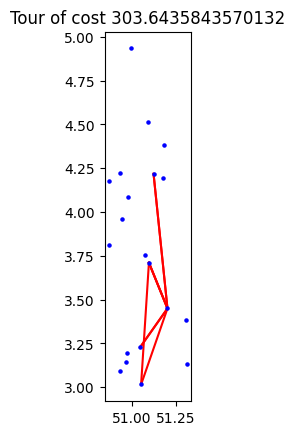

In [82]:
# Plot the cities and the best tour
fig, ax = plt.subplots()
plot_cities(ax, subset)
plot_tour(ax, best_tour, subset, best_fit)
plt.show()

In [74]:
def elementary_random_swap(tour):
    """
    This function performs an elementary random swap operation on a tour.
    It randomly selects two cities and swaps their positions in the tour.

    Input:
    - tour: A list of city indices representing the tour.

    Output:
    - new_tour: A new tour obtained by swapping two cities in the input tour.
    """
    new_tour = tour.copy()
    i,j = random.sample(tour, 2)
    new_tour[i], new_tour[j] =  tour.copy()[j] , tour.copy()[i]       # Swapping the positions of two cities in the tour
    return new_tour 

def Simulated_Annealing_TSP(compute_tour_cost, tour0, distances, hyperparameters):
    """
    This function applies the Simulated Annealing algorithm to solve the Traveling Salesman Problem.

    Inputs:
    - compute_tour_cost: A function that computes the cost of a tour.
    - tour0: The initial tour.
    - distances: A 2D numpy array representing the distance between each pair of cities.
    - hyperparameters: A dictionary containing the hyperparameters for the algorithm.

    Outputs:
    - tour_star: The best tour found by the algorithm.
    - tour_path: A list of tours representing the path taken by the algorithm.
    - fbest: A list of the best cost found at each iteration.
    - temperatures: A list of the temperature at each iteration.
    """
    # get hyperparameters
    Tmax = hyperparameters['Tmax']  # Maximum (starting) temperature
    Tmin = hyperparameters['Tmin']  # Minimum (stopping) temperature
    r = hyperparameters['r']  # Rate of cooling
    N_it = hyperparameters['N_iterations']  # Number of iterations at each temperature

    # init outputs
    temp = Tmax  # Current temperature
    tour_star = tour0.copy()  # Current best tour
    tour_path = [tour0.copy()]  # List of tours taken
    fbest = [compute_tour_cost(tour0, distances)]  # List of best costs
    temperatures = [temp]  # List of temperatures
    fstar = compute_tour_cost(tour_star, distances)  # Current best cost

    while temp> Tmin:  # While the current temperature is greater than the minimum temperature
        for _ in range(N_it):  # For each iteration at the current temperature
            new_tour = elementary_random_swap(tour_star)  # Generate a new tour by randomly swapping two cities in the current best tour
            fnew =  compute_tour_cost(new_tour, distances)  # Compute the cost of the new tour
            if np.exp((fstar-fnew)/temp)  > np.random.rand():  # If the new tour is better than the current best tour, or if the algorithm decides to explore a worse solution
                tour_star=new_tour.copy()  # Update the current best tour to the new tour
                fstar=fnew  # Update the current best cost to the cost of the new tour
        tour_path.append(tour_star.copy())  # Add the current best tour to the list of tours taken
        fbest.append(fstar.copy())  # Add the current best cost to the list of best costs
        temp *=r  # Decrease the temperature
        temperatures.append(temp)  # Add the current temperature to the list of temperatures
    return tour_star, tour_path, fbest, temperatures  # Return the best tour found, the list of tours

In [75]:
hyperparameters = {'Tmax' : 100, 'Tmin' : 0.005, 'r' : 0.96, 'N_iterations' : 1000}
def plot_cities(ax, coordinates, color="blue"):
    """
    Plots the cities on a given axis.

    Inputs:
        - ax : the ax to plot on
        - coordinates : the coordinates of the cities
        - color : color of the cities (default blue)
    """
    p = ax.scatter(coordinates[:,0], coordinates[:,1], color=color, s=5, zorder=2)
    ax.set_aspect('equal')
    return p

#plotting one tour
def plot_tour(ax, tour, coordinates, distances, color="red", title=True):
    """
    Draws a tour on a given axis.

    Inputs:
        - ax : the ax to plot on
        - tour : a tour a list of indices
        - coordinates : the coordinates of the cities
        - distances : the matrix with distances
        - color : color of the tour (default red)
        - title : boolean, plot the title with cost?
    """
    for i, j in zip(tour[1:], tour[:-1]):
         xi, yi = coordinates[i,:]
         xj, yj = coordinates[j,:]
         ax.plot([xi, xj], [yi, yj], color=color, zorder=1)
            
            
    i, j = tour[-1], tour[0]
    xi, yi = coordinates[i,:]
    xj, yj = coordinates[j,:]

    p=ax.plot([xi, xj], [yi, yj], color=color, zorder=1)
       
    if title:
        ax.set_title('Tour of cost {:.2f}'.format(compute_tour_cost(tour,
                                                                distances)))
    
    return p
    
    
def compute_tour_cost(tour, distances):
    """
    Computes the total cost of a tour of the TSP. Optionally provides a
    sanity check to see of the tour is a correct solution.

    Input:
        - tour : list of n integers from 1 to n describing the order of the tour
                    (invariant under cyclic permunations)
        - distances : n x n distance matrix
        - check : boolean, check if a valid tour, default False

    Ouput:
        - tour_cost : cost of the tour
    """
    tour_cost = np.sum(distances[tour[:-1], tour[1:]])                     #complete   ( connect all cities, except the first and the last)
    tour_cost += distances[tour[-1], tour[0]]                                 #complete (connect the fist and the last city)
    return tour_cost


In [76]:
import itertools as it

def yield_some_permutations(tour, mtry):
    """
    Yields mtry permutations of a tour.
    """
    count = 0
    for perm in it.permutations(tour)  :                   #complete
        yield list(perm)
        count += 1
        if count > mtry:
            break
            
# determine min tour cost, starting from tour with index first city to index last city, for all permutations            
def lazy_brute_force(distances, mtry=1000):
    n, _ = distances.shape
    print(n)  #cities
    return min(yield_some_permutations(list(range(n)), mtry), key=lambda t : compute_tour_cost(t, distances))

dist_matrix = distance_matrix(subset[:, ::-1], subset[:, ::-1])

list(yield_some_permutations(dist_matrix, 10))              #  why range(len(A)) ?
tour0 = lazy_brute_force(dist_matrix, mtry=1000)   # play around with number of permutation generated

100


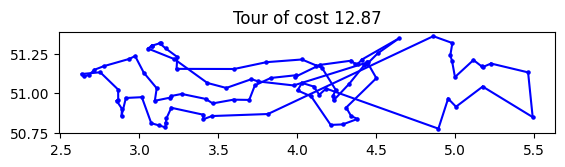

In [77]:
_best_tour, _tour_path, _best_tour_cost, _temperatures = Simulated_Annealing_TSP(compute_tour_cost, tour0, dist_matrix, hyperparameters)   #complete

fig, ax = plt.subplots()
plot_cities(ax, subset)
plot_tour(ax, _best_tour, subset, dist_matrix, color="blue", title=True)
plt.show()